In [54]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
folder = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\04-2024\10 Apr 2024'

In [16]:
filenames = glob.glob1(folder, '*Wait*')

In [17]:
filenames

['Low Field Wait.csv',
 'Low Field Wait_1.csv',
 'Low Field Wait_2.csv',
 'Low Field Wait_3.csv',
 'Med Field Wait.csv',
 'Med Field Wait_1.csv',
 'Med Field Wait_2.csv',
 'Med Field Wait_3.csv',
 'Med Field Wait_4.csv']

In [20]:
lowFieldfnames = filenames[0:4]
medFieldfnames = filenames[-4:]

In [28]:
dfmed = []

for f in medFieldfnames:
    dfmed.append( pd.read_csv( os.path.join(folder, f) ) )
    
dfmed = pd.concat(dfmed)

In [27]:
dflow = []

for f in lowFieldfnames:
    dflow.append( pd.read_csv( os.path.join(folder, f) ) )
    
dflow = pd.concat(dflow)

In [34]:
dfmed1 = dfmed[['wait', 'AtomNumber_yfit']]
dflow1 = dflow[['wait', 'AtomNumber_yfit']]

In [36]:
medAtomNo = dfmed1.groupby('wait').mean()
medAtomNoStd = dfmed1.groupby('wait').std()

In [39]:
lowAtomNo = dflow1.groupby('wait').mean()
lowAtomNoStd = dflow1.groupby('wait').std()

In [74]:
ratio = lowAtomNo / medAtomNo

In [75]:
ratioStd = ratio * ( (medAtomNoStd/medAtomNo)**2 + (lowAtomNoStd/lowAtomNo)**2 )**0.5

In [59]:
ratio.shape

(6, 1)

In [69]:
ratio.index.shape

(6,)

In [72]:
ratioStd

,AtomNumber_yfit
wait,
100.0,0.256582
500.0,0.236280
1000.0,0.226219
2000.0,0.294497
3500.0,0.356001
5000.0,0.317415


Text(0, 0.5, 'Low filed / Med field')

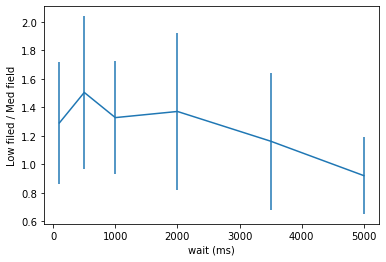

In [77]:
plt.errorbar(ratio.index, ratio.AtomNumber_yfit, yerr=ratioStd.AtomNumber_yfit )
plt.xlabel('wait (ms)')
plt.ylabel('Low filed / Med field')

In [42]:
lowAtomNoStd

,AtomNumber_yfit
wait,
100.0,101540.208582
500.0,104224.612466
1000.0,88060.675575
2000.0,77944.106323
3500.0,59414.386692
5000.0,33310.527138


In [44]:
lowAtomNo

,AtomNumber_yfit
wait,
100.0,452603.801125
500.0,469624.698195
1000.0,396420.991694
2000.0,316617.801120
3500.0,220163.186657
5000.0,143056.184031


In [43]:
lowAtomNoStd**2

,AtomNumber_yfit
wait,
100.0,1.031041e+10
500.0,1.086277e+10
1000.0,7.754683e+09
2000.0,6.075284e+09
3500.0,3.530069e+09
5000.0,1.109591e+09


In [46]:
lowAtomNoStd / lowAtomNo

,AtomNumber_yfit
wait,
100.0,0.224347
500.0,0.221932
1000.0,0.222139
2000.0,0.246177
3500.0,0.269865
5000.0,0.232849


In [47]:
dfmed1.groupby('wait').count()

,AtomNumber_yfit
wait,
100.0,23
500.0,23
1000.0,23
2000.0,23
3500.0,23
5000.0,23


In [48]:
dflow1.groupby('wait').count()

,AtomNumber_yfit
wait,
100.0,28
500.0,28
1000.0,28
2000.0,28
3500.0,28
5000.0,28


In [51]:
dfmed1.groupby('wait').std() / dfmed1.groupby('wait').sem() 

,AtomNumber_yfit
wait,
100.0,4.795832
500.0,4.795832
1000.0,4.795832
2000.0,4.795832
3500.0,4.795832
5000.0,4.795832


In [52]:
23**0.5

4.795831523312719

In [50]:
dfmed1.groupby('wait').std()

,AtomNumber_yfit
wait,
100.0,85457.635093
500.0,86705.133235
1000.0,60388.152006
2000.0,73918.558063
3500.0,59428.863262
5000.0,27440.912143
